In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from warnings import simplefilter
import scipy.stats as stats
from sklearn import metrics

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Loading the dataset
score = pd.read_csv("C:/Users/fetih.kaya/Desktop/Credit_Score_Dataset.csv")

## EXPLORATORY DATA ANALYSIS & DATA PREPROCESSING

In [4]:
#Shape of dataset
score.shape

(29904, 26)

In [5]:
#Column labels
score.columns

Index(['AGE', 'CRED', 'MS', 'HEQ', 'INCOME', 'DEPC', 'MOB', 'MILEAGE',
       'RESTYPE', 'GENDER', 'EMP_STA', 'RES_STA', 'DELINQ', 'NUMTR', 'MRTGI',
       'MFDU', 'resp', 'female', 'HOME', 'CONDO', 'COOP', 'renter', 'emp1',
       'emp2', 'msn', 'cuscode'],
      dtype='object')

In [6]:
#Some example rows 
score.head(10)

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,EMP_STA,RES_STA,DELINQ,NUMTR,MRTGI,MFDU,resp,female,HOME,CONDO,COOP,renter,emp1,emp2,msn,cuscode
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,"1,2","1,2",0,2,N,0,0,0,1,0,0,1,1,0,0,1
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,0,"1,2",2,2,Y,0,0,0,1,0,0,1,0,0,0,2
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,"1,2","1,2",1,0,Y,0,0,0,1,0,0,1,1,0,0,3
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,"1,2","1,2",0,0,Y,0,0,1,1,0,0,1,1,0,0,4
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,"1,2","1,2",1,0,Y,0,0,1,1,0,0,1,1,0,0,5
5,19,467.0,U,0.1,20,Y,N,16.239,HOME,F,"1,2","1,2",0,0,Y,0,0,1,1,0,0,1,1,0,0,6
6,19,334.0,X,0.1,20,N,Y,8.743,RENTER,M,"1,2","1,2",0,1,N,1,1,0,0,0,0,1,1,0,0,7
7,20,519.0,U,0.1,20,N,Y,13.820,HOME,M,"1,2","1,2",4,3,U,0,0,0,1,0,0,1,1,0,0,8
8,19,480.0,M,0.1,20,N,Y,15.132,RENTER,M,3+,"1,2",4,1,N,1,0,0,0,0,0,1,0,1,1,9
9,19,309.0,U,0.1,20,Y,Y,19.472,HOME,M,"1,2","1,2",0,0,Y,0,0,0,1,0,0,1,1,0,0,10


In [7]:
#It is found that the dataset contains attributes and their dummy variables together.
#'HOME', 'CONDO', 'COOP', 'renter' and 'MFDU' attributes are dummy variables of 'RESTYPE' attribute.
#'female' attribute is dummy variable of 'GENDER' attribute.
#'emp1' and 'emp2' attributes are dummy variables of 'EMP_STA' attribute.
#'msn' attribute dummy variable of 'MS' attribute.

#Remove derived attributes to reach original dataset

score = score.drop(['msn', 'HOME', 'CONDO', 'COOP', 'renter', 'female', 'emp1', 'emp2', 'MFDU' ], axis=1)

#Also remove the 'cuscode' attribute because it is just row numbers of the dataset, not carry information

score = score.drop(['cuscode'], axis=1)

In [8]:
#After dropping the dataset

score.head(10)

#There are still some dummy or categorized attributes whose original attribute does not exist in the data set like
#'DELINQUE', 'NUMTR', 'MFDU' and 'resp'

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,EMP_STA,RES_STA,DELINQ,NUMTR,MRTGI,resp
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,"1,2","1,2",0,2,N,0
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,0,"1,2",2,2,Y,0
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,"1,2","1,2",1,0,Y,0
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,"1,2","1,2",0,0,Y,0
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,"1,2","1,2",1,0,Y,0
5,19,467.0,U,0.1,20,Y,N,16.239,HOME,F,"1,2","1,2",0,0,Y,0
6,19,334.0,X,0.1,20,N,Y,8.743,RENTER,M,"1,2","1,2",0,1,N,1
7,20,519.0,U,0.1,20,N,Y,13.820,HOME,M,"1,2","1,2",4,3,U,0
8,19,480.0,M,0.1,20,N,Y,15.132,RENTER,M,3+,"1,2",4,1,N,0
9,19,309.0,U,0.1,20,Y,Y,19.472,HOME,M,"1,2","1,2",0,0,Y,0


In [9]:
#Data types of attributes
score.dtypes

#All the data types are coherent with displayed example rows.

AGE          int64
CRED       float64
MS          object
HEQ        float64
INCOME       int64
DEPC        object
MOB         object
MILEAGE    float64
RESTYPE     object
GENDER      object
EMP_STA     object
RES_STA     object
DELINQ       int64
NUMTR        int64
MRTGI       object
resp         int64
dtype: object

In [10]:
#Unique entry quantities of each attributes
score.nunique()

#The 'HEQ' and 'INCOME' attributes represents categories even they are numerical values.

AGE           73
CRED         662
MS             3
HEQ            7
INCOME         7
DEPC           2
MOB            2
MILEAGE    15078
RESTYPE        4
GENDER         2
EMP_STA        3
RES_STA        2
DELINQ         8
NUMTR          8
MRTGI          3
resp           2
dtype: int64

In [11]:
#Missing data
number_of_missing_data = (score.isnull().sum()).sort_values(ascending=False)
number_of_missing_data = pd.DataFrame(number_of_missing_data, columns=['# of missing values'])                                                                    
percentage_of_missing_data = (score.isnull().sum()/score.shape[0]*100).sort_values(ascending=False)
percentage_of_missing_data = pd.DataFrame(percentage_of_missing_data, columns=['% of missing part'])
missing = pd.concat([number_of_missing_data,percentage_of_missing_data], axis=1) 

missing

#There is no missing value in the dataset

,# of missing values,% of missing part
CRED,33,0.110353
resp,0,0.000000
MRTGI,0,0.000000
NUMTR,0,0.000000
DELINQ,0,0.000000
RES_STA,0,0.000000
EMP_STA,0,0.000000
GENDER,0,0.000000
RESTYPE,0,0.000000
MILEAGE,0,0.000000


In [12]:
#Removing missing value containing rows in 'CRED' column. Because it is our target variable and should not consist missings

score = score.dropna(how='any')
score = score.reset_index(drop=True)

In [13]:
#Duplicated rows
score.duplicated().value_counts()

#There is no duplicated rows

False    29871
dtype: int64

In [14]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29871 entries, 0 to 29870
Data columns (total 16 columns):
AGE        29871 non-null int64
CRED       29871 non-null float64
MS         29871 non-null object
HEQ        29871 non-null float64
INCOME     29871 non-null int64
DEPC       29871 non-null object
MOB        29871 non-null object
MILEAGE    29871 non-null float64
RESTYPE    29871 non-null object
GENDER     29871 non-null object
EMP_STA    29871 non-null object
RES_STA    29871 non-null object
DELINQ     29871 non-null int64
NUMTR      29871 non-null int64
MRTGI      29871 non-null object
resp       29871 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 3.6+ MB


##### VISUALIZATIONS 

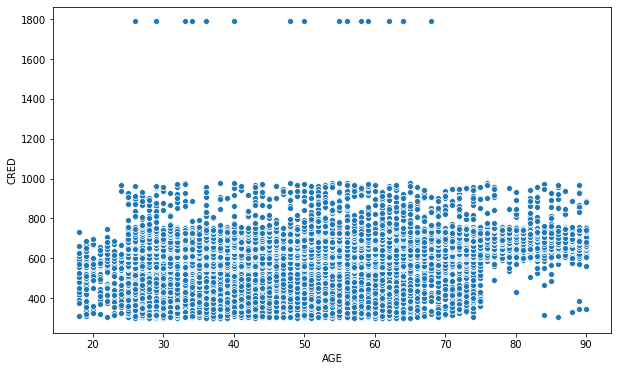

In [15]:
#'AGE' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.scatterplot(x="AGE", y="CRED", data= score)

#It seems there is not much effect of age on credit score except age less than 25 and more than 75

In [16]:
#Remove outliers
for i in range(score.shape[0]):
    if score.CRED[i] > 1600:
        score = score.drop(i, axis=0)
        
score = score.reset_index(drop=True)

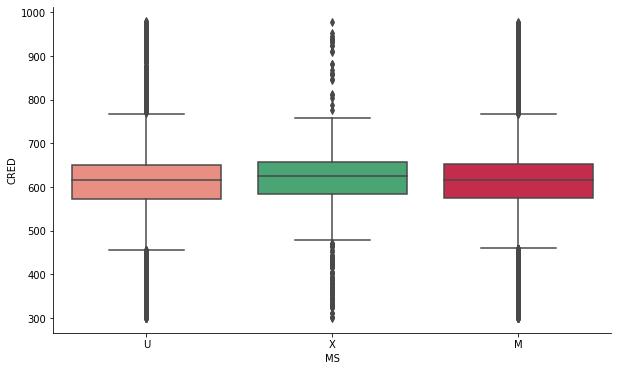

In [17]:
#'MS' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='MS', y='CRED', data=score, palette=['salmon', 'mediumseagreen', 'crimson'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'MS' does not affect credit scoring

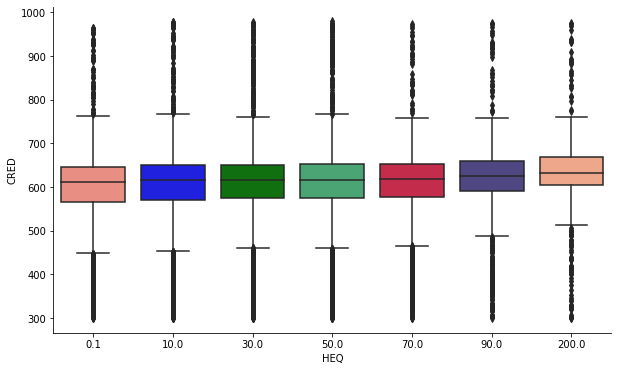

In [18]:
#'HEQ' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='HEQ', y='CRED', data=score, palette=['salmon', 'blue', 'green', 'mediumseagreen', 'crimson', 
                                                    'darkslateblue', 'lightsalmon'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'HEQ' has a little effect on credit scoring

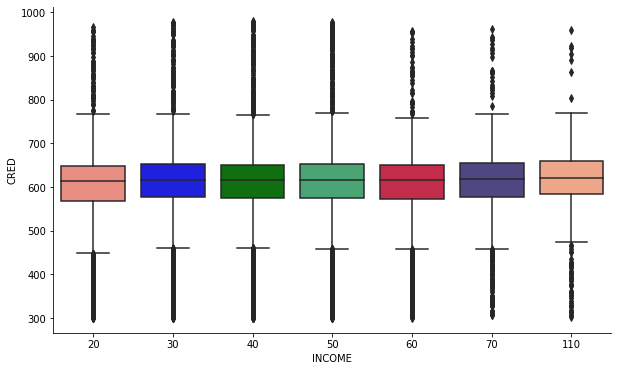

In [19]:
#'INCOME' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='INCOME', y='CRED', data=score, palette=['salmon', 'blue', 'green', 'mediumseagreen', 'crimson', 
                                                       'darkslateblue', 'lightsalmon'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'INCOME' has a little effect on credit scoring

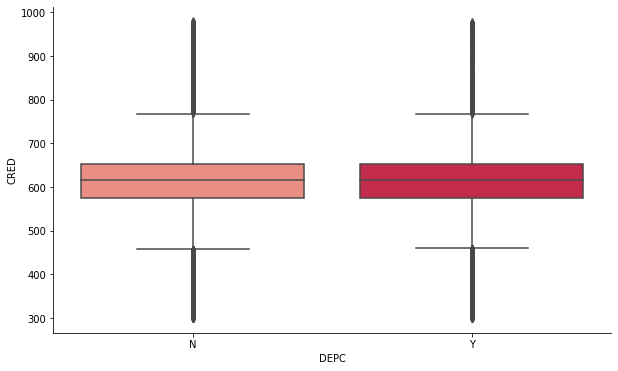

In [20]:
#'DEPC' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='DEPC', y='CRED', data=score, palette=['salmon', 'crimson'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'DEPC' has no effect on credit scoring

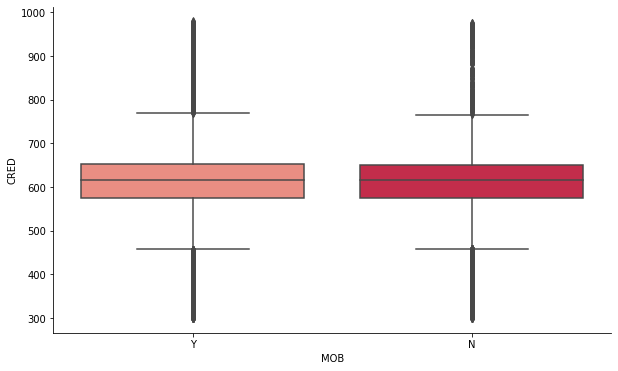

In [21]:
#'MOB' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='MOB', y='CRED', data=score, palette=['salmon', 'crimson'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'DEPC' has a little effect on credit scoring

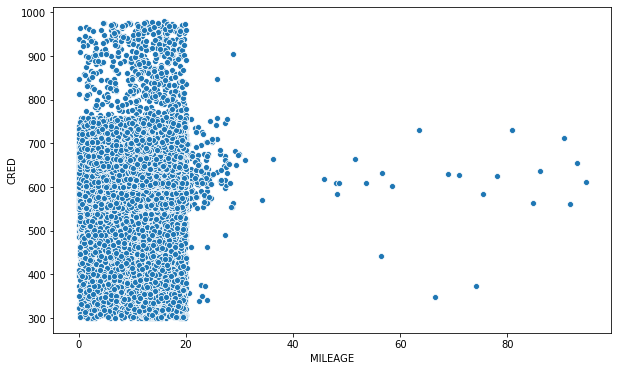

In [22]:
#'MILEAGE' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.scatterplot(x="MILEAGE", y="CRED", data= score)

#It seems there is no effect on credit scoring

In [23]:
#Remove outliers
for i in range(score.shape[0]):
    if score.MILEAGE[i] > 40:
        score = score.drop(i, axis=0)
        
score = score.reset_index(drop=True)

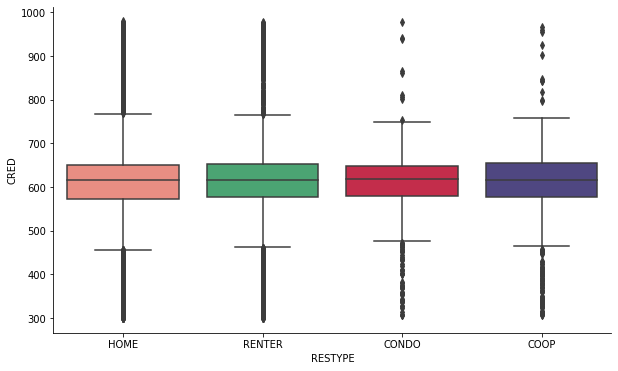

In [24]:
#'RESTYPE' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='RESTYPE', y='CRED', data=score, palette=['salmon', 'mediumseagreen', 'crimson', 
                                                       'darkslateblue'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'RESTYPE' has a little effect on credit scoring

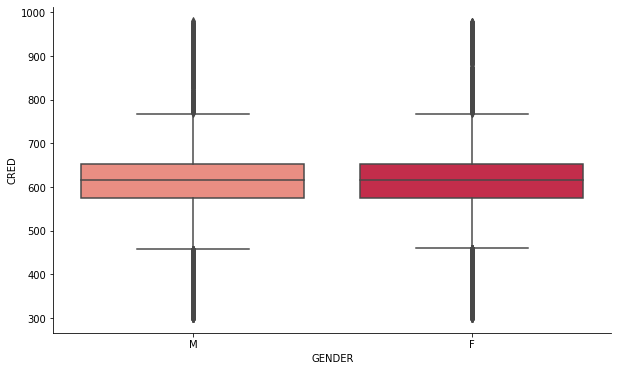

In [25]:
#'GENDER' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='GENDER', y='CRED', data=score, palette=['salmon', 'crimson'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'GENDER' has a little effect on credit scoring

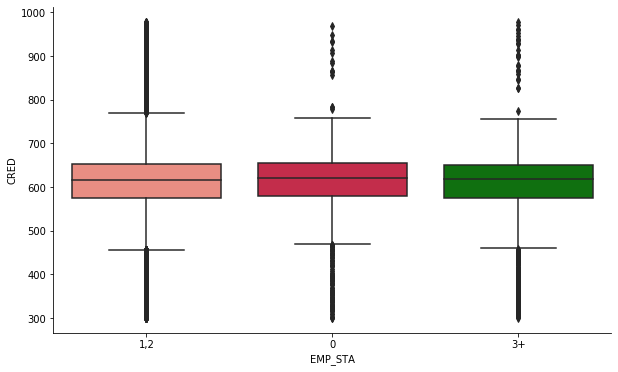

In [26]:
#'EMP_STA' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='EMP_STA', y='CRED', data=score, palette=['salmon', 'crimson', 'green'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'EMP_STA' has a little effect on credit scoring

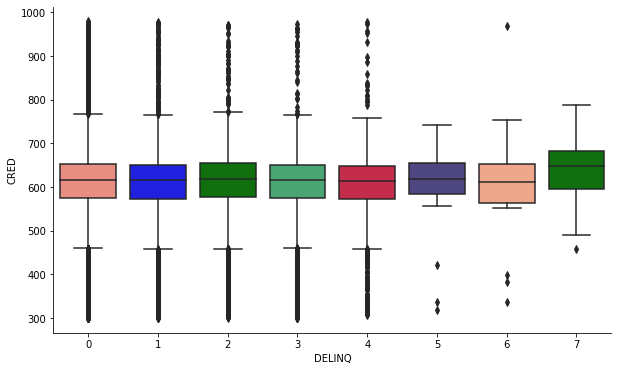

In [27]:
#'DELINQ' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='DELINQ', y='CRED', data=score, palette=['salmon', 'blue', 'green', 'mediumseagreen', 'crimson', 
                                                       'darkslateblue', 'lightsalmon', 'green'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'DELINQ' has an effect on credit scoring on 5, 6 and 7 groups

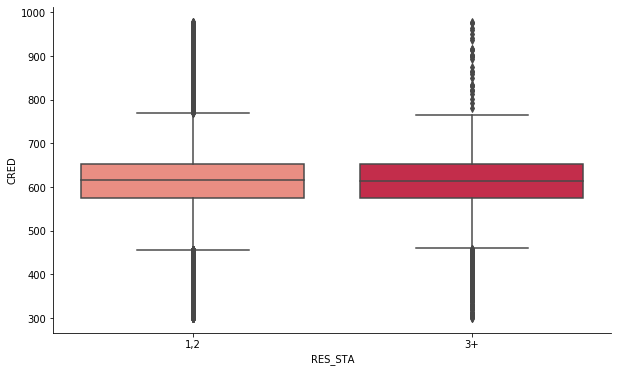

In [28]:
#'RES_STA' and 'CRED'

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.boxplot(x='RES_STA', y='CRED', data=score, palette=['salmon', 'crimson'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#It seems 'RES_STA' has a little effect on credit scoring

##### CONVERTING CATEGORICAL VALUES INTO NOMINAL VARIABLES

In [29]:
#'MS' attribute
for i in range(score.shape[0]):
    if score.MS[i] == 'M':
        score.MS[i] = 2
        continue
    if score.MS[i] == 'X':
        score.MS[i] = 1
        continue
    if score.MS[i] == 'U':
        score.MS[i] = 0
        continue      
score['MS'] = score['MS'].astype(int)

simplefilter('ignore')

#'DEPC' attribute
for i in range(score.shape[0]):
    if score.DEPC[i] == 'Y':
        score.DEPC[i] = 1
        continue
    if score.DEPC[i] == 'N':
        score.DEPC[i] = 0
        continue     
score['DEPC'] = score['DEPC'].astype(int)

simplefilter('ignore')

#'MOB' attribute
for i in range(score.shape[0]):
    if score.MOB[i] == 'Y':
        score.MOB[i] = 1
        continue
    if score.MOB[i] == 'N':
        score.MOB[i] = 0
        continue   
score['MOB'] = score['MOB'].astype(int)

simplefilter('ignore')

#'RESTYPE' attribute
for i in range(score.shape[0]):
    if score.RESTYPE[i] == 'HOME':
        score.RESTYPE[i] = 3
        continue
    if score.RESTYPE[i] == 'CONDO':
        score.RESTYPE[i] = 2
        continue
    if score.RESTYPE[i] == 'COOP':
        score.RESTYPE[i] = 1
        continue
    if score.RESTYPE[i] == 'RENTER':
        score.RESTYPE[i] = 0
        continue
score['RESTYPE'] = score['RESTYPE'].astype(int)

simplefilter('ignore')

#'GENDER' attribute
for i in range(score.shape[0]):
    if score.GENDER[i] == 'F':
        score.GENDER[i] = 1
        continue
    if score.GENDER[i] == 'M':
        score.GENDER[i] = 0
        continue   
score['GENDER'] = score['GENDER'].astype(int)

simplefilter('ignore')

#'EMP_STA' attribute
for i in range(score.shape[0]):
    if score.EMP_STA[i] == '3+':
        score.EMP_STA[i] = 2
        continue
    if score.EMP_STA[i] == '1,2':
        score.EMP_STA[i] = 1
        continue
    if score.EMP_STA[i] == '0':
        score.EMP_STA[i] = 0
        continue      
score['EMP_STA'] = score['EMP_STA'].astype(int)

simplefilter('ignore')

#'RES_STA' attribute
for i in range(score.shape[0]):
    if score.RES_STA[i] == '3+':
        score.RES_STA[i] = 2
        continue
    if score.RES_STA[i] == '1,2':
        score.RES_STA[i] = 1
        continue   
score['RES_STA'] = score['RES_STA'].astype(int)

simplefilter('ignore')


#'MRTGI' attribute
for i in range(score.shape[0]):
    if score.MRTGI[i] == 'Y':
        score.MRTGI[i] = 2
        continue
    if score.MRTGI[i] == 'N':
        score.MRTGI[i] = 1
        continue
    if score.MRTGI[i] == 'U':
        score.MRTGI[i] = 0
        continue      
score['MRTGI'] = score['MRTGI'].astype(int)

simplefilter('ignore')


C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gu

##### CORRELATION CHECK

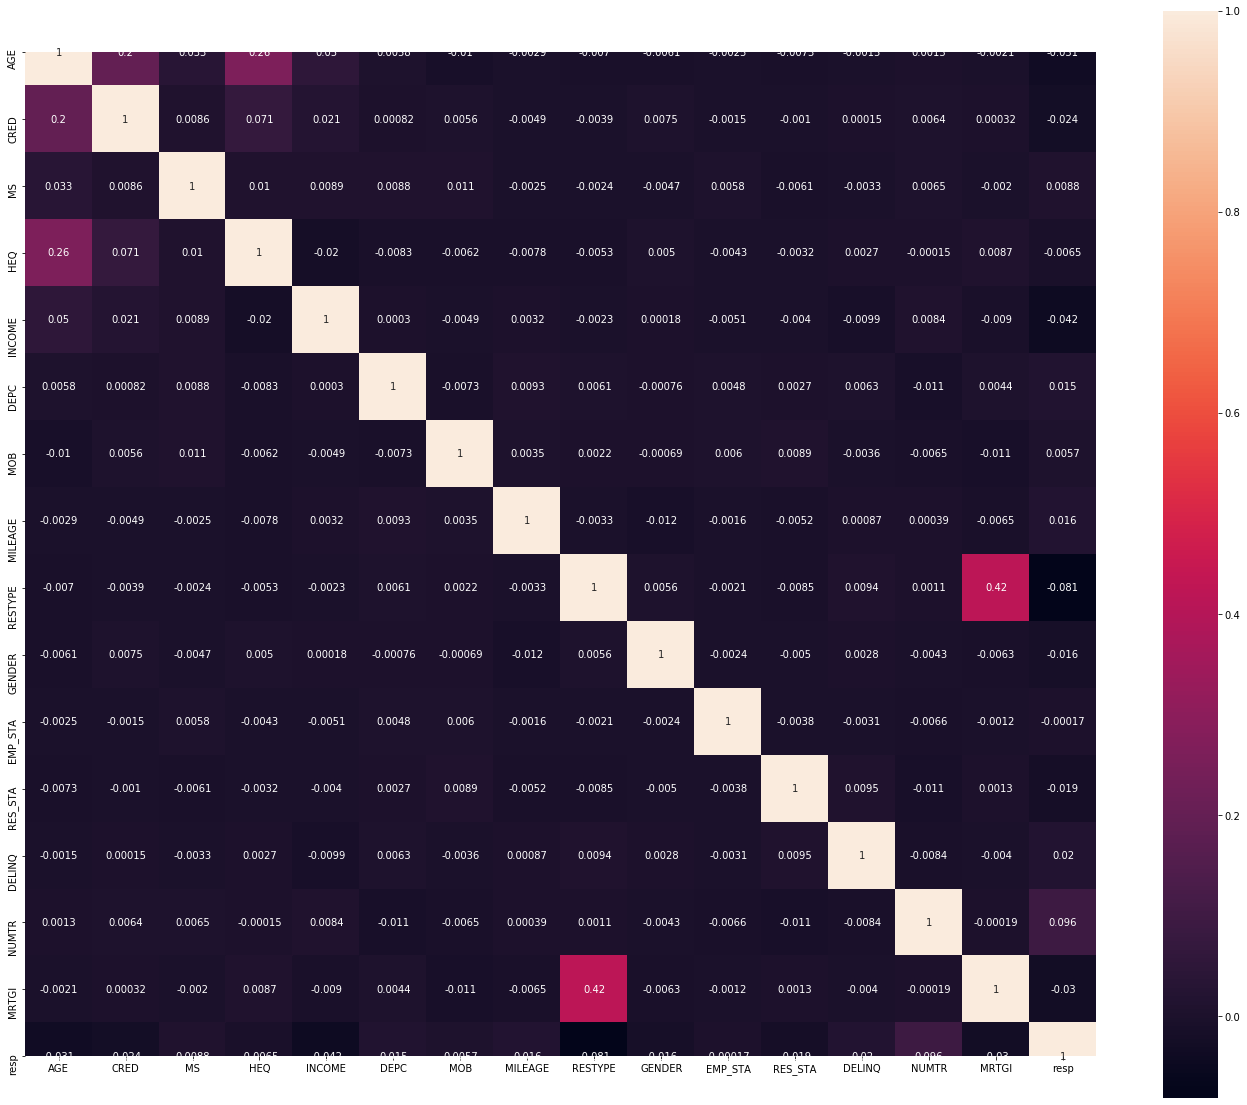

In [30]:
#Correlation search

f, ax = plt.subplots(figsize=(24,20))
sns.heatmap(score.corr(), annot=True, square=True)

In [31]:
attributes = []
cor_values = []
p_values = []

for i in range(len(score.columns)):
    attributes.append(score.columns[i])
    cor_val, p_val = stats.pearsonr(score.iloc[:,i], score.loc[:,'CRED'])
    cor_values.append(cor_val)
    p_values.append(p_val)

df1 = pd.DataFrame(attributes, columns = ["Attributes"])
df2 = pd.DataFrame(cor_values, columns = ["Pearson Corr."])
df3 = pd.DataFrame(p_values, columns = ["P-Values"])

df2 = df2.abs()

df  = pd.concat([df1,df2,df3], axis=1)
df  = df.sort_values(["Pearson Corr."], ascending = False)
df  = df.reset_index(drop=True)

df

,Attributes,Pearson Corr.,P-Values
0,CRED,1.000000,0.000000e+00
1,AGE,0.195585,5.258431e-255
2,HEQ,0.070769,1.949165e-34
3,resp,0.023751,4.084110e-05
4,INCOME,0.020571,3.804445e-04
5,MS,0.008646,1.353460e-01
6,GENDER,0.007503,1.949910e-01
7,NUMTR,0.006376,2.708058e-01
8,MOB,0.005623,3.314812e-01
9,MILEAGE,0.004856,4.016698e-01


##### SPLIT TRAIN AND TEST DATASETS

In [32]:
score_x = score.drop('CRED', axis=1)
score_y = score.CRED
score_x_train, score_x_test, score_y_train, score_y_test = train_test_split(score_x, score_y, test_size=0.2)

score_x_train = score_x_train.reset_index(drop=True)
score_x_test = score_x_test.reset_index(drop=True)
score_y_train = score_y_train.reset_index(drop=True)
score_y_test = score_y_test.reset_index(drop=True)

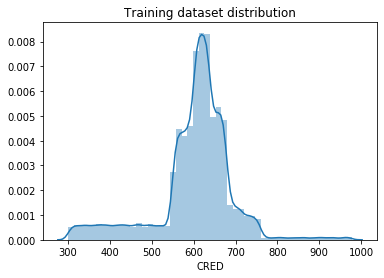

In [33]:
plt.title('Training dataset distribution')
sns.distplot(score_y_train)

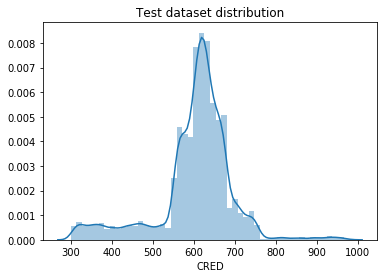

In [34]:
plt.title('Test dataset distribution')
sns.distplot(score_y_test)

## MODELLING

In [35]:
def adjustedr2(r2,p,n):
    return 1 - (1-r2)*(n-1)/(n-p-1)

### Apply step-wise forward regression for Linear Regression and Decision Tree

#### Linear Regression  

In [36]:
attributes = ['AGE']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(1)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_1  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_1  = df_1.reset_index(drop=True)

pd.set_option('max_colwidth', 400)

df_1



,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


##### Continue to add more attributes if both R2 and adjustedR2 of test set increase and RMSE decrease 

In [37]:
#Adding 'HEQ' attribute

attributes = ['AGE','HEQ']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + HEQ'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_2  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_101 = pd.concat([df_1,df_2], axis=0)
df_101 = df_101.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_101  = df_101.reset_index(drop=True)

df_101


#Adding 'HEQ' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375
1,Linear regression(2),AGE + HEQ,92.2601,0.0391,0.0390,0.0368,0.0365


In [38]:
#Adding 'resp' attribute

attributes = ['AGE', 'resp']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_3  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_102 = pd.concat([df_1,df_3], axis=0)
df_102 = df_102.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_102  = df_102.reset_index(drop=True)

df_102


#Adding 'resp' attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [39]:
#Adding 'INCOME' attribute

attributes = ['AGE', 'resp', 'INCOME']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + INCOME'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_4  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_103 = pd.concat([df_102,df_4], axis=0)
df_103 = df_103.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_103  = df_103.reset_index(drop=True)

df_103


#Adding 'INCOME' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + INCOME,92.1966,0.0388,0.0387,0.0381,0.0376
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [40]:
#Adding 'MS' attribute

attributes = ['AGE', 'resp', 'MS']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + MS'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_5  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_104 = pd.concat([df_102,df_5], axis=0)
df_104 = df_104.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_104  = df_104.reset_index(drop=True)

df_104


#Adding 'MS' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + MS,92.1934,0.0386,0.0385,0.0382,0.0377
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [41]:
#Adding 'GENDER' attribute

attributes = ['AGE', 'resp', 'GENDER']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + GENDER'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_6  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_105 = pd.concat([df_102,df_6], axis=0)
df_105 = df_105.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_105  = df_105.reset_index(drop=True)

df_105


#Adding 'GENDER' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + GENDER,92.1802,0.0387,0.0386,0.0384,0.0379
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [42]:
#Adding 'NUMTR' attribute

attributes = ['AGE', 'resp', 'NUMTR']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + NUMTR'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_7  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_106 = pd.concat([df_102,df_7], axis=0)
df_106 = df_106.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_106  = df_106.reset_index(drop=True)

df_106


#Adding 'NUMTR' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + NUMTR,92.1852,0.0387,0.0386,0.0383,0.0378
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [43]:
#Adding 'MOB' attribute

attributes = ['AGE', 'resp', 'MOB']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + MOB'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_8  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_107 = pd.concat([df_102,df_8], axis=0)
df_107 = df_107.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_107  = df_107.reset_index(drop=True)

df_107


#Adding 'MOB' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375
2,Linear regression(3),AGE + resp + MOB,92.2025,0.0387,0.0386,0.0380,0.0375


In [44]:
#Adding 'MILEAGE' attribute

attributes = ['AGE', 'resp', 'MILEAGE']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + MILEAGE'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_9  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_108 = pd.concat([df_102,df_9], axis=0)
df_108 = df_108.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_108  = df_108.reset_index(drop=True)

df_108


#Adding 'MILEAGE' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + MILEAGE,92.1876,0.0386,0.0385,0.0383,0.0378
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [45]:
#Adding 'RESTYPE' attribute

attributes = ['AGE', 'resp', 'RESTYPE']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + RESTYPE'], columns=["Used attributes"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_10  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_109 = pd.concat([df_102,df_10], axis=0)
df_109 = df_109.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_109  = df_109.reset_index(drop=True)

df_109

#Adding 'RESTYPE' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + RESTYPE,92.1876,0.0386,0.0385,0.0384,0.0379
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [46]:
#Adding 'EMP_STA' attribute

attributes = ['AGE', 'resp', 'EMP_STA']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + EMP_STA'], columns=["Used attributes"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_11  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_110 = pd.concat([df_102,df_11], axis=0)
df_110 = df_110.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_110  = df_110.reset_index(drop=True)

df_110


#Adding 'EMP_STA' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + EMP_STA,92.1876,0.0386,0.0385,0.0383,0.0378
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [47]:
#Adding 'RES_STA' attribute

attributes = ['AGE', 'resp', 'RES_STA']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + RES_STA'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_12  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_111 = pd.concat([df_102,df_12], axis=0)
df_111 = df_111.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_111  = df_111.reset_index(drop=True)

df_111


#Adding 'RES_STA' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + RES_STA,92.1883,0.0386,0.0385,0.0383,0.0378
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [48]:
#Adding 'DEPC' attribute

attributes = ['AGE', 'resp', 'DEPC']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + DEPC'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_13  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_112 = pd.concat([df_102,df_13], axis=0)
df_112 = df_112.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_112  = df_112.reset_index(drop=True)

df_112


#Adding 'DEPC' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + DEPC,92.1865,0.0386,0.0385,0.0383,0.0378
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


In [49]:
#Adding 'MRTGI' attribute

attributes = ['AGE', 'resp', 'MRTGI']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + MRTGI'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_14  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_113 = pd.concat([df_102,df_14], axis=0)
df_113 = df_113.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_113  = df_113.reset_index(drop=True)

df_113


#Adding 'MRTGI' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375
2,Linear regression(3),AGE + resp + MRTGI,92.1998,0.0386,0.0385,0.0380,0.0375


In [50]:
#Adding 'DELINQ' attribute

attributes = ['AGE', 'resp', 'DELINQ']

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train[attributes],score_y_train)
pred_lr = model_lr.predict(score_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train[attributes],score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test[attributes],score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(3)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp + DELINQ'], columns=["Used attributes"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_15  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_114 = pd.concat([df_102,df_15], axis=0)
df_114 = df_114.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_114  = df_114.reset_index(drop=True)

df_114

#Adding 'DELINQ' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
1,Linear regression(3),AGE + resp + DELINQ,92.1998,0.0386,0.0385,0.0383,0.0378
2,Linear regression(1),AGE,92.2171,0.0384,0.0384,0.0377,0.0375


#### Decision Tree

In [51]:
attributes2 = ['AGE']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(1)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_001  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)

df_001


,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.04,0.0398


In [52]:
#Adding 'HEQ' attribute

attributes2 = ['AGE', 'HEQ']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + HEQ'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_002  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_202 = pd.concat([df_001,df_002], axis=0)
df_202 = df_202.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_202  = df_202.reset_index(drop=True)

df_202

#Adding 'HEQ' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + HEQ,92.9893,0.0652,0.0651,0.0215,0.0212


In [53]:
#Adding 'resp' attribute

attributes2 = ['AGE', 'resp']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + resp'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_003  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_203 = pd.concat([df_001,df_003], axis=0)
df_203 = df_203.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_203  = df_203.reset_index(drop=True)

df_203

#Adding 'resp' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + resp,92.2320,0.0520,0.0519,0.0374,0.0371


In [54]:
#Adding 'INCOME' attribute

attributes2 = ['AGE', 'INCOME']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + INCOME'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_004  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_204 = pd.concat([df_001,df_004], axis=0)
df_204 = df_204.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_204  = df_204.reset_index(drop=True)

df_204

#Adding 'INCOME' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + INCOME,92.7956,0.0648,0.0647,0.0256,0.0253


In [55]:
#Adding 'MS' attribute

attributes2 = ['AGE', 'MS']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + MS'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_005  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_205 = pd.concat([df_001,df_005], axis=0)
df_205 = df_205.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_205  = df_205.reset_index(drop=True)

df_205

#Adding 'MS' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + MS,92.3531,0.0537,0.0536,0.0348,0.0345


In [56]:
#Adding 'GENDER' attribute

attributes2 = ['AGE', 'GENDER']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + GENDER'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_006  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_206 = pd.concat([df_001,df_006], axis=0)
df_206 = df_206.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_206  = df_206.reset_index(drop=True)

df_206

#Adding 'GENDER' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + GENDER,92.1953,0.0520,0.0519,0.0381,0.0378


In [57]:
#Adding 'NUMTR' attribute

attributes2 = ['AGE', 'NUMTR']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + NUMTR'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_007  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_207 = pd.concat([df_001,df_007], axis=0)
df_207 = df_207.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_207  = df_207.reset_index(drop=True)

df_207

#Adding 'NUMTR' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + NUMTR,93.3221,0.0645,0.0644,0.0145,0.0142


In [58]:
#Adding 'MOB' attribute

attributes2 = ['AGE', 'MOB']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + MOB'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_008  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_208 = pd.concat([df_001,df_008], axis=0)
df_208 = df_208.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_208  = df_208.reset_index(drop=True)

df_208

#Adding 'MOB' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.040,0.0398
1,Decision tree(2),AGE + MOB,92.2499,0.0529,0.0528,0.037,0.0367


In [59]:
#Adding 'MILEAGE' attribute

attributes2 = ['AGE', 'MILEAGE']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + MILEAGE'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_009  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_209 = pd.concat([df_001,df_009], axis=0)
df_209 = df_209.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_209  = df_209.reset_index(drop=True)

df_209

#Adding 'MILEAGE' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + MILEAGE,130.2312,0.9889,0.9889,-0.9192,-0.9198


In [60]:
#Adding 'RESTYPE' attribute

attributes2 = ['AGE', 'RESTYPE']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + RESTYPE'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_010  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_210 = pd.concat([df_001,df_010], axis=0)
df_210 = df_210.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_210  = df_210.reset_index(drop=True)

df_210

#Adding 'RESTYPE' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + RESTYPE,92.3516,0.0568,0.0567,0.0349,0.0346


In [61]:
#Adding 'EMP_STA' attribute

attributes2 = ['AGE', 'EMP_STA']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + EMP_STA'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_011  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_211 = pd.concat([df_001,df_011], axis=0)
df_211 = df_211.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_211  = df_211.reset_index(drop=True)

df_211

#Adding 'EMP_STA' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + EMP_STA,92.3000,0.0538,0.0537,0.0359,0.0356


In [62]:
#Adding 'RES_STA' attribute

attributes2 = ['AGE', 'RES_STA']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + RES_STA'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_012  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_212 = pd.concat([df_001,df_012], axis=0)
df_212 = df_212.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_212  = df_212.reset_index(drop=True)

df_212

#Adding 'RES_STA' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + RES_STA,92.3368,0.0536,0.0535,0.0352,0.0349


In [63]:
#Adding 'DEPC' attribute

attributes2 = ['AGE', 'DEPC']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + DEPC'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_013  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_213 = pd.concat([df_001,df_013], axis=0)
df_213 = df_213.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_213  = df_213.reset_index(drop=True)

df_213

#Adding 'DEPC' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + DEPC,92.2172,0.0517,0.0516,0.0377,0.0374


In [64]:
#Adding 'MRTGI' attribute

attributes2 = ['AGE', 'MRTGI']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + MERTGI'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_014  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_214 = pd.concat([df_001,df_014], axis=0)
df_214 = df_214.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_214  = df_214.reset_index(drop=True)

df_214

#Adding 'MRTGI' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + MERTGI,92.3105,0.0548,0.0547,0.0357,0.0354


In [65]:
#Adding 'DELINQ' attribute

attributes2 = ['AGE', 'DELINQ']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train[attributes2],score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test[attributes2])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train[attributes2],score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes2),score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test[attributes2],score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes2),score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(2)'], columns = ["Model"])
df2 = pd.DataFrame(['AGE + DELINQ'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_015  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_215 = pd.concat([df_001,df_015], axis=0)
df_215 = df_215.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_215  = df_215.reset_index(drop=True)

df_215

#Adding 'DELINQ' attribute did not develop the model so not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Decision tree(2),AGE + DELINQ,92.4630,0.0632,0.0631,0.0325,0.0322


##### Without step-wise regression

In [66]:
#Linear regression application for all attributes

lr = linear_model.LinearRegression()
model_lr = lr.fit(score_x_train,score_y_train)
pred_lr = model_lr.predict(score_x_test)

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(score_x_train,score_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,score_x_train.shape[1],score_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(score_x_test,score_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,score_x_train.shape[1],score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(All)'], columns = ["Model"])
df2 = pd.DataFrame(['ALL'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_1001  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_1001  = df_1001.reset_index(drop=True)

df_1001


,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(All),ALL,92.2724,0.0399,0.0393,0.0365,0.0341


In [67]:
#Decision Tree application for all attributes

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(score_x_train,score_y_train)
pred_dec_tree = model_dec_tree.predict(score_x_test)

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(score_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(score_x_train,score_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,score_x_train.shape[1],score_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(score_x_test,score_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,score_x_train.shape[1],score_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(All)'], columns = ["Model"])
df2 = pd.DataFrame(['ALL'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_1003  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)

df_1003


,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(All),ALL,137.7479,1.0,1.0,-1.1472,-1.1526


### COMPARISON

In [68]:
df = pd.concat([df_3,df_001,df_1001,df_1003], axis=0)
df = df.sort_values(['R Squared (test)'], ascending=False)
df = df.reset_index(drop=True)

df

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(1),AGE,92.1069,0.0493,0.0493,0.0400,0.0398
1,Linear regression(2),AGE + resp,92.1865,0.0386,0.0385,0.0383,0.0380
2,Linear regression(All),ALL,92.2724,0.0399,0.0393,0.0365,0.0341
3,Decision tree(All),ALL,137.7479,1.0000,1.0000,-1.1472,-1.1526
